In [1]:
import nltk
import pandas as pd
import csv
from pprint import pprint
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('punkt')



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hrishikeshtelang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [80]:
sentences=[]
df1 = pd.read_csv('cleanIR.csv',delimiter="\n")
df1.columns=['content']
df1
for i in range(9373):
    sentences.append(df1.content[i].split())
sentences[10]


['security',
 'regime',
 'among',
 'democracy',
 'cooperation',
 'among',
 'iroquois',
 'nation',
 'neta',
 'crawford']

In [81]:
import gensim
dictionary = gensim.corpora.Dictionary(sentences)
print(dictionary)

Dictionary(20751 unique tokens: ['demo', 'uniperse', 'confronting', 'kant', 'parasite']...)


In [82]:
bow_corpus = [dictionary.doc2bow(doc) for doc in sentences]
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 1.0)]


In [83]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=2, id2word=dictionary)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.005*"iroquois" + 0.003*"league" + 0.002*"morgan" + 0.002*"iroquoia" + 0.002*"economics" + 0.002*"site" + 0.002*"mohawk" + 0.002*"nation" + 0.002*"woman" + 0.002*"peace"
Topic: 1 Word: 0.003*"iroquois" + 0.003*"nation" + 0.002*"lafitau" + 0.002*"economics" + 0.002*"peace" + 0.002*"seneca" + 0.002*"site" + 0.002*"village" + 0.001*"great" + 0.001*"five"


# Doc2Vec

In [84]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [85]:
j=0
LabeledSentence1 = gensim.models.doc2vec.TaggedDocument
tagged_data=[]
for i in sentences:
    tagged_data.append(LabeledSentence1(i,[j]))
    j=j+1
    

In [86]:
len(tagged_data)

9373

In [87]:
d2v_model = Doc2Vec(tagged_data, size = 2000, window = 10, min_count = 500, workers=7, dm = 1, 
                alpha=0.025, min_alpha=0.001)

/anaconda3/envs/tensorflow/lib/python3.5/site-packages/gensim/models/doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [88]:
d2v_model.train(tagged_data, total_examples=d2v_model.corpus_count, epochs=10, start_alpha=0.002, end_alpha=-0.016)

# Checking similar documents

In [89]:
print (d2v_model.docvecs.most_similar(18))
print(tagged_data[175],tagged_data[143])
tagged_data[18]

[(1461, 0.07600613683462143), (5407, 0.07431960105895996), (7553, 0.07242535054683685), (7756, 0.07112127542495728), (3844, 0.06970618665218353), (3696, 0.0688977986574173), (583, 0.06796165555715561), (5670, 0.06779761612415314), (9063, 0.06706210970878601), (2262, 0.0665554329752922)]
TaggedDocument(['parker', 'constitution', 'five', 'nation'], [175]) TaggedDocument(['given', 'people', 'time', 'useful', 'necessary', 'obseiver', 'cadwallader', 'colden', 'noted', 'nation', 'absolute', 'republick', 'every', 'castle', 'nation', 'make', 'independent', 'republick', 'governed', 'publick', 'affair', 'sachem', 'fenton', 'argues', 'community', 'local', 'zealously', 'maintained', 'defended', 'note', 'diversity', 'continues', 'historian', 'agree', 'five', 'nation', 'retained', 'full', 'sovereignty', 'affair', 'importantly', 'member', 'iroquois', 'league', 'free', 'make', 'peace'], [143])


TaggedDocument(words=['grateful', 'elizabeth', 'cohen', 'barbara', 'cruikshank', 'stanley', 'hoffmann', 'robert', 'keohane', 'peterson', 'laura', 'reed', 'bruce', 'russett', 'giving', 'article', 'particularly', 'close', 'critical', 'reading', 'sarah', 'deutsch', 'james', 'derian', 'cynthia', 'enloe', 'steven', 'flank', 'david', 'guston', 'peter', 'haas', 'jack', 'levy', 'barry', 'peterson', 'jackie', 'urla', 'also', 'made', 'useful', 'suggestion', 'steve', 'miller', 'harvard', 'center', 'science', 'international', 'affair', 'provided', 'institutional', 'support', 'research', 'anonymous', 'reviewer', 'john', 'odell', 'international', 'organization', 'critic', 'best', 'sort', 'finally', 'grateful', 'descendent', 'nation', 'many', 'live', 'york', 'ontario', 'quebec'], tags=[18])

# K-Means

In [90]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

kmeans_model = KMeans(n_clusters=2, init='k-means++', max_iter=100)  
X = kmeans_model.fit(d2v_model.docvecs.doctag_syn0)
labels=kmeans_model.labels_.tolist()
l = kmeans_model.fit_predict(d2v_model.docvecs.doctag_syn0)
pca = PCA(n_components=2).fit(d2v_model.docvecs.doctag_syn0)
datapoint = pca.transform(d2v_model.docvecs.doctag_syn0)

/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  
/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  
/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  if __name__ == '__main__':
/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  # Remove the CWD from sys.path while we load stuff.


# Unclear results obtained for Iroquois

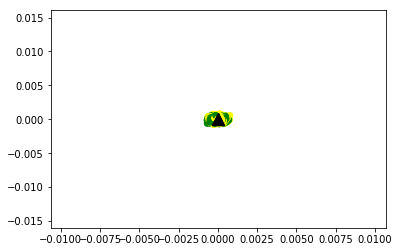

In [91]:
plt.figure
label1 = ["#FFFF00", "#008000"]
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

In [77]:
with open('simwest.csv', 'w',encoding="utf-8") as writer:
    writer = csv.writer(writer, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for n in range(11803):
        l=[]
        for i in d2v_model.docvecs.most_similar(n):
            
            a=i[0]
            l.append(tagged_data[a])
        writer.writerow(l)
print("done")

done


TaggedDocument(['reason', 'studying', 'general', 'item', 'swedish', 'side', 'used', 'later', 'part', 'study', 'torsten', 'gihl', 'svenska', 'utrikespolitikens', 'historia', 'stockholm', 'eric', 'bellquist', 'aspect', 'recent', 'swedish', 'foreign', 'policy', 'university', 'california', 'publication', 'berkeley', 'norwegian', 'published', 'three', 'work', 'interest', 'bernt', 'nissen', 'oslo'], [11000])
0
TaggedDocument(['merkelige', 'oslo', 'yngvar', 'nielsen', 'norge'], [11001])
0
TaggedDocument(['horton', 'general', 'interest', 'serving'], [11002])
0
TaggedDocument(['broader', 'expanse', 'norwegian', 'history', 'work', 'orvik', 'decline', 'fall', 'neutrality', 'oslo'], [11003])
0
TaggedDocument(['faines', 'norway', 'nobel', 'peace', 'prize', 'york', 'national', 'romanticism', 'norway', 'york', 'theodore', 'jorgenson', 'norway', 'relation', 'scandinavian', 'unionism', 'northfield', 'wilhelm', 'keilhau', 'norge', 'verdensk', 'oslo', 'arne', 'bergsgiird'], [11004])
1
TaggedDocument(['os

In [92]:
zero=0
for i in labels:
    if i==0:
        zero=zero+1
ones=len(labels)-zero
print(zero,ones)

4726 4647
